Classification is a problem of predicting whether something is not one thing or anotherm

In [8]:
# 1. Mark own Data 
import sklearn
from sklearn.datasets import make_circles 

# Make samples
n_samples = 1000

# Create circles
x,y = make_circles(n_samples,noise=0.03,random_state=42)

In [9]:
len(x),len(y)

(1000, 1000)

In [10]:
print(f"First 5 samples of x : \n {x[:5]}")
print(f"First 5 samples of y : \n {y[:5]}")

First 5 samples of x : 
 [[ 0.75424625  0.23148074]
 [-0.75615888  0.15325888]
 [-0.81539193  0.17328203]
 [-0.39373073  0.69288277]
 [ 0.44220765 -0.89672343]]
First 5 samples of y : 
 [1 1 1 1 0]


In [11]:
#Make dataframe 
import pandas as pd
circles = pd.DataFrame({"x1":x[:,0],
                        "x2":x[:,1],
                        "label":y})
circles.head(5)

,x1,x2,label
0,0.754246,0.231481,1
1,-0.756159,0.153259,1
2,-0.815392,0.173282,1
3,-0.393731,0.692883,1
4,0.442208,-0.896723,0


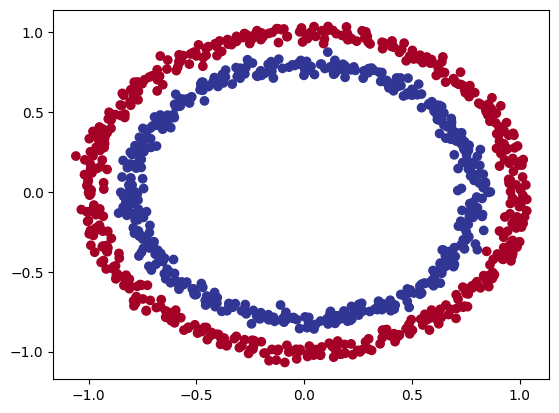

In [12]:
import matplotlib.pyplot as plt
plt.scatter(x=x[:,0],y=x[:,1],c=y,cmap=plt.cm.RdYlBu)

### Check input and output shapes

In [13]:
x.shape,y.shape

((1000, 2), (1000,))

In [14]:
x_samp = x[0]
y_samp = y[0]

print(f"value of x_samp = {x_samp} , value of y_sampe = {y_samp}")

value of x_samp = [0.75424625 0.23148074] , value of y_sampe = 1


### Turn data into tensors

In [15]:
import torch

In [16]:
torch.__version__

'2.0.1+cu118'

In [17]:
type(x),type(y)

(numpy.ndarray, numpy.ndarray)

In [18]:
# convert into tensor from numpy
x = torch.from_numpy(x).type(torch.float)
y = torch.from_numpy(y).type(torch.float)

### Split data into training and testing sets

In [19]:
from  sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=42)

In [20]:
len(x_train),len(x_test),len(y_train),len(y_test)

(800, 200, 800, 200)

### Building a model to classify our blue and red dots

 To do so -> steps 
 1. setup device 
 2. Construct a model 
 3. Define a loss function and optimizer 
 4. Create a training and test loop

In [21]:
 import torch 
 from torch import nn

In [22]:
device = 'cuda' if torch.cuda.is_available() else 'cpu'
device

'cuda'

In [23]:
x_train

tensor([[ 0.6579, -0.4651],
        [ 0.6319, -0.7347],
        [-1.0086, -0.1240],
        ...,
        [ 0.0157, -1.0300],
        [ 1.0110,  0.1680],
        [ 0.5578, -0.5709]])

#### lets creat a model :: 

1. subclass 'nn_module' 
2. create 2 'nn.linear'
3. define a forward()
4. instatiate a backward()

In [24]:
x_train.shape,y_train.shape

(torch.Size([800, 2]), torch.Size([800]))

In [25]:
#construct a model 
class CircleModelV0(nn.Module):
    def __init__(self):
        super().__init__()
        #creta 2 nn.linear layers 
        #in_featurs = 2 bcoz x as 2 featurs 
        
        #now next layer should have same infeatures of the outfeatures of previous layer
        self.layer_1 = nn.Linear(in_features=2,out_features=5)
        self.layer_2 = nn.Linear(in_features=5,out_features=1) #takes 5 featurs from pervious layer and output 1 features
        
    #define the forward() methid 
    def forward(self,x):
        return self.layer_2(self.layer_1(x)) # x -> layer_1 -> layer_2 -> output


#instantiate an instance of our model class and send it to the target device  
model_0 = CircleModelV0().to(device)
model_0

CircleModelV0(
  (layer_1): Linear(in_features=2, out_features=5, bias=True)
  (layer_2): Linear(in_features=5, out_features=1, bias=True)
)

In [26]:
device

'cuda'

In [27]:
next(model_0.parameters()).device

device(type='cuda', index=0)

In [28]:
torch.cuda.is_available()

True

In [36]:
#lets replicae the model above using nn.Sequential()
#Easiest way to create a neural network but still use the above one its most detailed one 
model_0 = nn.Sequential(nn.Linear(in_features=2,out_features=5),
    nn.Linear(in_features=5,out_features=1)
).to("cuda")



In [37]:
#modified code of CircleModelv0 after using sequential method 


class CircleModelV0(nn.Module):
    def __init__(self):
        super().__init__()
        
        
        #now next layer should have same infeatures of the outfeatures of previous layer
        # self.layer_1 = nn.Linear(in_features=2,out_features=5)
        # self.layer_2 = nn.Linear(in_features=5,out_features=1) #takes 5 featurs from pervious layer and output 1 features
        
        self.two_linear_layer = nn.Sequential(nn.Linear(in_features=2,out_features=5),
            nn.Linear(in_features=5,out_features=1)
        )
    #define the forward() methid 
    def forward(self,x):
        return self.layer_2(self.layer_1(x)) # x -> layer_1 -> layer_2 -> output



In [38]:
model_0.state_dict()

OrderedDict([('0.weight',
              tensor([[-0.3000,  0.3310],
                      [ 0.1871, -0.4772],
                      [ 0.0244,  0.3621],
                      [-0.5784, -0.1771],
                      [ 0.3055, -0.1235]], device='cuda:0')),
             ('0.bias',
              tensor([ 0.6498, -0.5704, -0.6602,  0.1846,  0.0640], device='cuda:0')),
             ('1.weight',
              tensor([[-0.1547, -0.3074,  0.1684, -0.2217,  0.0292]], device='cuda:0')),
             ('1.bias', tensor([-0.2390], device='cuda:0'))])

In [39]:
#Make predictions 
pred = model_0(x_test.to('cuda'))
print(f"Lenght of predictions :{len(pred)},Shape:{pred.shape}")
print(f"Lenght of test (i.e X ) sample :{len(x_test)} Shape:{x_test.shape}")
print(f"\nFirst 10 predictions:n {pred[:10]}")
print(f"\nFirst 10 lables:\n{y_test[:10]}")



Lenght of predictions :200,Shape:torch.Size([200, 1])
Lenght of test (i.e X ) sample :200 Shape:torch.Size([200, 2])

First 10 predictions:n tensor([[-0.2321],
        [-0.1280],
        [-0.4663],
        [-0.1659],
        [-0.4049],
        [-0.3418],
        [-0.0973],
        [-0.1472],
        [-0.4686],
        [-0.1203]], device='cuda:0', grad_fn=<SliceBackward0>)

First 10 lables:
tensor([1., 0., 1., 0., 1., 1., 0., 0., 1., 0.])


### Setup loss Function and optimizer

which loss function or optimizer you use ?

->for regression you might want MAE or MSE 

->for classification you might binary cross entropy or categorical croos entropy 


In [40]:
loss_fn = nn.BCEWithLogitsLoss() #sigmoid activation function

optimizer = torch.optim.SGD(params=model_0.parameters(),lr = 0.1)

In [41]:
#calculate accuracy
def accuracy_fn(y_true,y_pred):
    correct = torch.eq(y_true,y_pred).sum().item()
    acc = (correct/len(y_pred)) * 100
    return acc


### Train Model

to trian our model , we're going to need to build a training loop

1) forward pass 
2) calculate the loss 
3) optimizer zero grad 
4) loss backward(backpropagation)
5) optimizer step(gradient descent)


we can convert this logits into predictions probabalities by passin gto some kind of activation function (i.e sigmoid function or softmax function )



In [42]:
model_0.eval()
with torch.inference_mode():
    y_logits = model_0(x_test.to(device))[:5]
y_logits

tensor([[-0.2321],
        [-0.1280],
        [-0.4663],
        [-0.1659],
        [-0.4049]], device='cuda:0')

In [43]:
# Use the sigmoid activation function on our model logits to turn them into prediction probabilities
y_pred_probs = torch.sigmoid(y_logits)
y_pred_probs

tensor([[0.4422],
        [0.4681],
        [0.3855],
        [0.4586],
        [0.4001]], device='cuda:0')

For our prediction probability values , we need to perform a range-style rounding on them:
* 'y_pred_probs' >= 0.5 'y=1'
* 'y_pred_probs' <= 0.5 'y=0'

In [44]:
#find the predicted labels
y_pred = torch.round(y_pred_probs)


#in full (logits -> pred probs -> pred labesl)
y_pred_labels = torch.round(torch.sigmoid(model_0(x_test.to(device))[:5]))


#check for equality
print(torch.eq(y_pred.squeeze(),y_pred_labels.squeeze()))


#get rid of extra dimensions
y_pred.squeeze()

tensor([True, True, True, True, True], device='cuda:0')


tensor([0., 0., 0., 0., 0.], device='cuda:0')

In [45]:
y_test[:5]

tensor([1., 0., 1., 0., 1.])

### Building the test and training looping 

In [46]:
device

'cuda'

In [54]:
torch.manual_seed(42)
torch.cuda.manual_seed(42)

#set the number of epochs
epochs = 100

#put data to target device
x_train , y_train = x_train.to(device),y_train.to(device)
x_test , y_test = x_test.to(device),y_test.to(device)

#build training and evaluation loop
for epoch in range(epochs):
    ##training 
    model_0.train()
    
    #1.forward pass 
    y_logits = model_0(x_train).squeeze()
    y_pred = torch.round(torch.sigmoid(y_logits)) #turns logits -> predictions 
    
    #2 calculate loss and accuracy
    # loss = loss_fn(torch.sigmoid(y_logits),y_train) # nn.BCEloss expects predictions as input
    loss = loss_fn(y_logits,y_train) #nn.BCEWithLogistsLoss expects raw logits as input
    
    acc = accuracy_fn(y_true = y_train,y_pred = y_pred)
    
    
    #3. optimzier zero grad 
    optimizer.zero_grad()
    
    #4. loss backward
    loss.backward()
    
    #5. optimizer step
    optimizer.step()
    
    
    ###Testign####
    model_0.eval()
    with torch.no_grad():
        #1.forward pass
        test_logits = model_0(x_test).squeeze()
        test_pred = torch.round(torch.sigmoid(test_logits))
        
        #2.Calculate test loss/acc 
        test_loss = loss_fn(test_logits,y_test)
        
        test_acc = accuracy_fn(y_true = y_test,y_pred = test_pred)
    
    #print out whats happening
    if epoch % 10 == 0:
        print(f"Epoch:{epoch} || Loss : {loss:.5f} , Acc :{acc:.2f} || Test loss : {test_loss:.5f} , Test Acc : {test_acc:.2f}%")
    

Epoch:0 || Loss : 0.69315 , Acc :51.12 || Test loss : 0.69657 , Test Acc : 45.50%
Epoch:10 || Loss : 0.69313 , Acc :51.12 || Test loss : 0.69647 , Test Acc : 46.00%
Epoch:20 || Loss : 0.69312 , Acc :51.12 || Test loss : 0.69638 , Test Acc : 46.00%
Epoch:30 || Loss : 0.69310 , Acc :51.12 || Test loss : 0.69629 , Test Acc : 46.00%
Epoch:40 || Loss : 0.69309 , Acc :51.12 || Test loss : 0.69621 , Test Acc : 46.00%
Epoch:50 || Loss : 0.69308 , Acc :51.25 || Test loss : 0.69613 , Test Acc : 46.00%
Epoch:60 || Loss : 0.69307 , Acc :51.38 || Test loss : 0.69606 , Test Acc : 45.50%
Epoch:70 || Loss : 0.69306 , Acc :51.38 || Test loss : 0.69599 , Test Acc : 45.50%
Epoch:80 || Loss : 0.69306 , Acc :51.38 || Test loss : 0.69592 , Test Acc : 45.50%
Epoch:90 || Loss : 0.69305 , Acc :51.38 || Test loss : 0.69586 , Test Acc : 45.50%


### Make predictions and evaluate the model

from the metrics it looks our model doesnt learning  antyhing..

so to inspect it lets make some predictions and make them visual

In [56]:
 import requests
 from pathlib import Path

In [59]:
#Download helper functions from learn pytorch repository
if Path("helper_functions.py").is_file():
    print("Exist already")
else:
    print("Download helper_functions.py")
    req = requests.get("https://raw.githubusercontent.com/mrdbourke/pytorch-deep-learning/main/helper_functions.py")
    with open("helper_functions.py", "wb") as f:
        f.write(req.content)
    

Download helper_functions.py


In [60]:
from helper_functions import plot_predictions,plot_decision_boundary

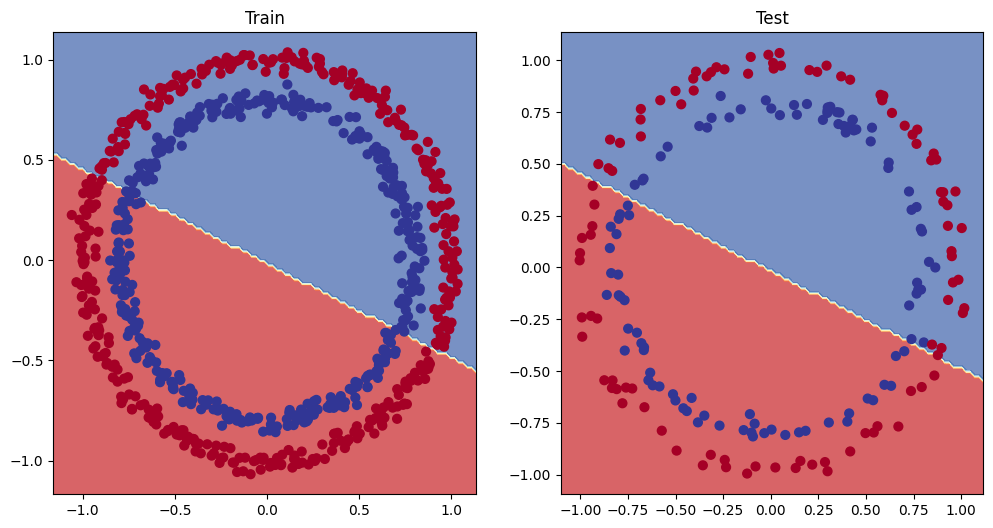

In [62]:
plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
plt.title('Train')
plot_decision_boundary(model_0,x_train,y_train)

plt.subplot(1,2,2)
plt.title("Test")
plot_decision_boundary(model_0,x_test,y_test)

Since you can see our model draws the a string line but still it cannot classify the blue and red points 
so we need to imporve our model for better accuracy


### Imporving the model

Add more layers - give the model more chances to learn about patterns in the data

Add more hidden unites - go from 5 hidden units to 10 hidden units

Fit for longer 

Changin the activation functions

Change the learning rate




In [89]:
#modifie the current model
class CircleModelV1(nn.Module):
    def __init__(self):
        super().__init__()
        
        self.layer_1 = nn.Linear(in_features=2,out_features=10)
        self.layer_2 = nn.Linear(in_features=10,out_features=10)
        self.layer_3 = nn.Linear(in_features=10,out_features=1)
        # self.three_linear_layer = nn.Sequential(nn.Linear(in_features=2,out_features=10),
        #     nn.Linear(in_features=10,out_features=10),
        #     nn.Linear(in_features=10,out_features=1),
        # )
    #define the forward() method 
    def forward(self,x):
        return  self.layer_3(self.layer_2(self.layer_1(x))) # x -> layer_1 -> layer_2 -> layer_3 -> output



In [94]:
model_1 = CircleModelV1().to(device)
model_1

CircleModelV1(
  (layer_1): Linear(in_features=2, out_features=10, bias=True)
  (layer_2): Linear(in_features=10, out_features=10, bias=True)
  (layer_3): Linear(in_features=10, out_features=1, bias=True)
)

In [95]:
#Create a loss function
loss_fn = nn.BCEWithLogitsLoss()
#Create an optimizer
optimizer = torch.optim.SGD(params=model_1.parameters(),lr=0.1)

In [97]:
#write a training and evaluation loop for model_1
torch.manual_seed(42)
torch.cuda.manual_seed(42)

#train for longer 
epochs = 1000

#put data on the target device
x_train,y_train = x_train.to(device),y_train.to(device)
x_test,y_test = x_test.to(device),y_test.to(device)

for epoch in range(epochs):
    ##training
    model_1.train()
    
    #1. Forward pass
    y_logitss = model_1(x_train).squeeze()
    y_pred = torch.round(torch.sigmoid(y_logits))
    
    #2. Calculate the loss/acc
    loss = loss_fn(y_logitss,y_train)
    acc = accuracy_fn(y_true = y_train,y_pred = y_pred)
    
    #3optimizer zero gra
    optimizer.zero_grad()
    
    #4 loss backward 
    loss.backward()
    
    #5 optimzer step(gradient descent)
    optimizer.step()
    
    ###testing 
    model_1.eval()
    
    with torch.inference_mode():
        #1. forward pass
        test_logits = model_1(x_test).squeeze()
        test_pred = torch.round(torch.sigmoid(test_logits))
        
        #2 calculate loss
        test_loss = loss_fn(test_logits,y_test)
        test_acc = accuracy_fn(y_true = y_test,y_pred = test_pred)
        
    #print out whats happenin
    if epoch % 100 == 0:
        print(f"Epoch:{epoch} || loss : {loss:.5f} , acc : {acc:.3f} || test loss : {test_loss:.5f} , test accc : {test_acc:.3f}")

Epoch:0 || loss : 0.69517 , acc : 51.250 || test loss : 0.69248 , test accc : 49.500
Epoch:100 || loss : 0.69325 , acc : 51.250 || test loss : 0.69283 , test accc : 51.000
Epoch:200 || loss : 0.69309 , acc : 51.250 || test loss : 0.69344 , test accc : 46.500
Epoch:300 || loss : 0.69303 , acc : 51.250 || test loss : 0.69385 , test accc : 47.500
Epoch:400 || loss : 0.69300 , acc : 51.250 || test loss : 0.69412 , test accc : 46.500
Epoch:500 || loss : 0.69299 , acc : 51.250 || test loss : 0.69431 , test accc : 46.000
Epoch:600 || loss : 0.69298 , acc : 51.250 || test loss : 0.69444 , test accc : 46.000
Epoch:700 || loss : 0.69298 , acc : 51.250 || test loss : 0.69452 , test accc : 45.500
Epoch:800 || loss : 0.69298 , acc : 51.250 || test loss : 0.69458 , test accc : 44.500
Epoch:900 || loss : 0.69298 , acc : 51.250 || test loss : 0.69461 , test accc : 45.000


In [100]:
#further modifing the model with non-linear activation functions
class CircleModelV2(nn.Module):
    def __init__(self):
        super().__init__()
        self.layer_1 = nn.Linear(in_features=2, out_features=10)
        self.layer_2 = nn.Linear(in_features=10, out_features=10)
        self.layer_3 = nn.Linear(in_features=10, out_features=1)
        self.relu = nn.ReLU() # <- add in ReLU activation function
        # Can also put sigmoid in the model 
        # This would mean you don't need to use it on the predictions
        # self.sigmoid = nn.Sigmoid()
        
    def forward(self,x):
        # Intersperse the ReLU activation function between layers
       return self.layer_3(self.relu(self.layer_2(self.relu(self.layer_1(x)))))

In [101]:
model_3 = CircleModelV2().to(device)
model_3

CircleModelV2(
  (layer_1): Linear(in_features=2, out_features=10, bias=True)
  (layer_2): Linear(in_features=10, out_features=10, bias=True)
  (layer_3): Linear(in_features=10, out_features=1, bias=True)
  (relu): ReLU()
)

In [105]:
torch.manual_seed(42)
epochs = 1000

for epoch in range(epochs):
    y_logits = model_3(x_train).squeeze()
    y_pred = torch.round(torch.sigmoid(y_logits))
    
    loss = loss_fn(y_logits,y_train)
    acc = accuracy_fn(y_true=y_train,y_pred=y_pred)
    
    optimizer.zero_grad()
    
    loss.backward()
    
    optimizer.step()
    
    model_3.eval()
    
    with torch.no_grad():
        test_logits = model_3(x_test).squeeze()
        test_pred = torch.round(torch.sigmoid(test_logits))
        
        test_loss = loss_fn(test_logits,y_test)
        test_acc = accuracy_fn(y_true = y_test,y_pred = test_pred)
        
    if epoch % 100 == 0:
        print(f"Epoch:{epoch} || loss : {loss:.5f} , acc : {acc:.3f} || test loss : {test_loss:.5f} , test accc : {test_acc:.3f}")



Epoch:0 || loss : 0.69295 , acc : 50.000 || test loss : 0.69325 , test accc : 50.000
Epoch:100 || loss : 0.69295 , acc : 50.000 || test loss : 0.69325 , test accc : 50.000
Epoch:200 || loss : 0.69295 , acc : 50.000 || test loss : 0.69325 , test accc : 50.000
Epoch:300 || loss : 0.69295 , acc : 50.000 || test loss : 0.69325 , test accc : 50.000
Epoch:400 || loss : 0.69295 , acc : 50.000 || test loss : 0.69325 , test accc : 50.000
Epoch:500 || loss : 0.69295 , acc : 50.000 || test loss : 0.69325 , test accc : 50.000
Epoch:600 || loss : 0.69295 , acc : 50.000 || test loss : 0.69325 , test accc : 50.000
Epoch:700 || loss : 0.69295 , acc : 50.000 || test loss : 0.69325 , test accc : 50.000
Epoch:800 || loss : 0.69295 , acc : 50.000 || test loss : 0.69325 , test accc : 50.000
Epoch:900 || loss : 0.69295 , acc : 50.000 || test loss : 0.69325 , test accc : 50.000


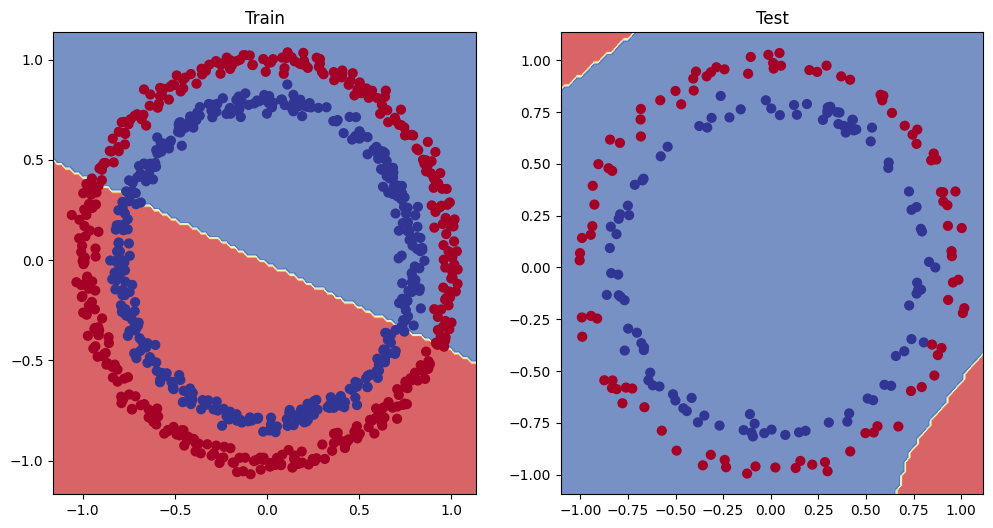

In [106]:
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.title("Train")
plot_decision_boundary(model_1, x_train, y_train) # model_1 = no non-linearity
plt.subplot(1, 2, 2)
plt.title("Test")
plot_decision_boundary(model_3, x_test, y_test) # model_3 = has non-linearity